In [1]:
from keras import models
from keras import layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load emnist_letters.npz, and output some of the images

data = np.load(r"C:\Users\psiro\Handwritten character recognition\emnist_letters.npz") # load the file emnist_letters.npz
# 6 sets of the data
test_images = data['test_images']
test_labels = data['test_labels']
train_images = data['train_images']
train_labels = data['train_labels']
validate_images = data['validate_images']
validate_labels = data['validate_labels']

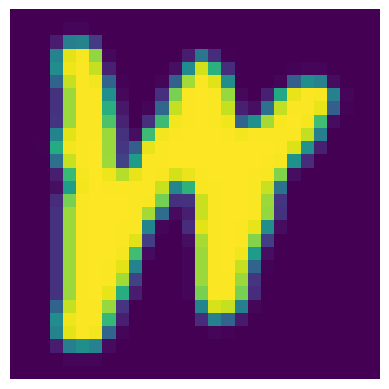

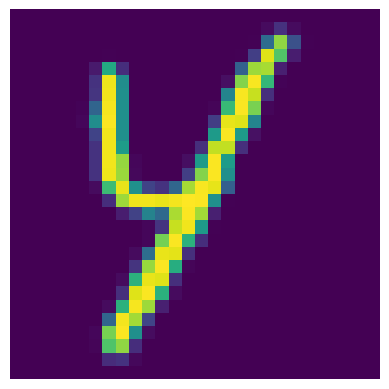

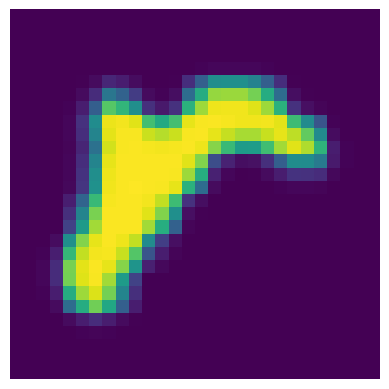

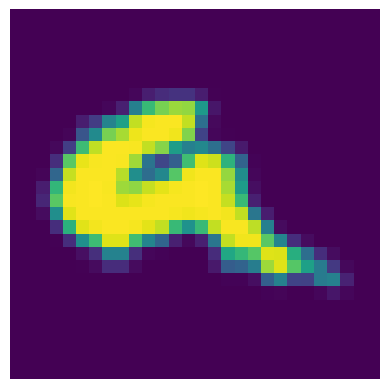

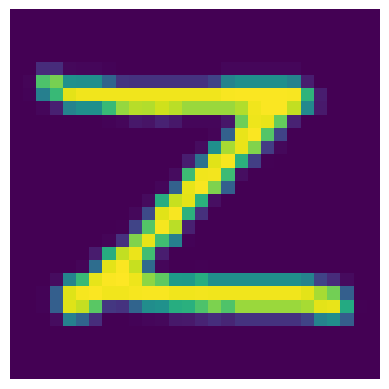

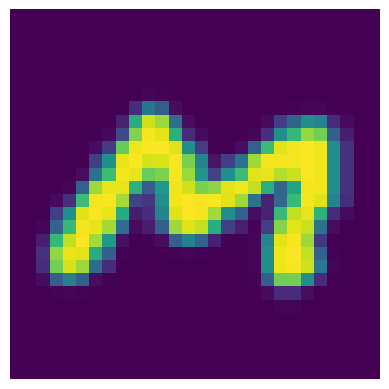

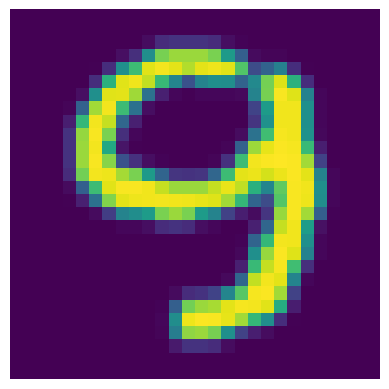

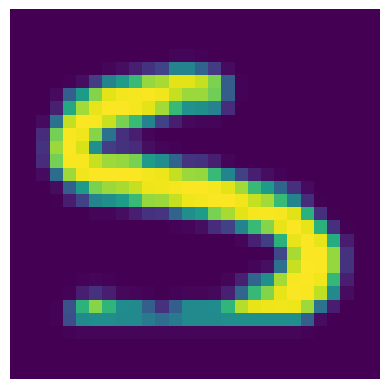

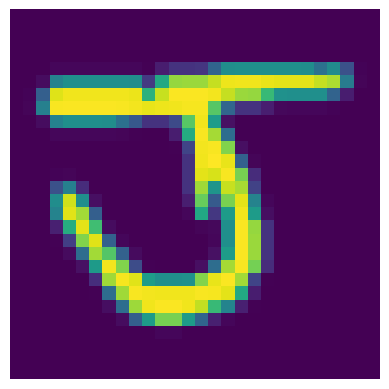

In [4]:
# output 9 images
train1 = np.reshape(train_images[0], (28, 28))
test1 = np.reshape(test_images[0], (28, 28))
validate1 = np.reshape(validate_images[0], (28, 28))
train2 = np.reshape(train_images[103999], (28, 28))
test2 = np.reshape(test_images[20799], (28, 28))
validate2 = np.reshape(validate_images[20799], (28, 28))
train3 = np.reshape(train_images[10000], (28, 28))
test3 = np.reshape(test_images[10000], (28, 28))
validate3 = np.reshape(validate_images[10000], (28, 28))
L = [train1, train2, train3, test1, test2, test3, validate1, validate2, validate3]
for item in L:
    plt.imshow(item) 
    plt.axis('off') 
    plt.show()

In [5]:
# show the shape of every set    
print("Shape of train set:", train_images.shape)
print("Shape of train label:", train_labels.shape)
print("Shape of test set:", test_images.shape)
print("Shape of test label:", test_labels.shape)
print("Shape of validate set:", validate_images.shape)
print("Shape of validate label:", validate_labels.shape)

Shape of train set: (104000, 784)
Shape of train label: (104000, 27)
Shape of test set: (20800, 784)
Shape of test label: (20800, 27)
Shape of validate set: (20800, 784)
Shape of validate label: (20800, 27)


In [6]:
# Reshaping the images
train_images = train_images.reshape((104000, 28 * 28))
test_images = test_images.reshape((20800, 28 * 28))
validate_images = validate_images.reshape((20800, 28 * 28))

In [7]:
#Creating and training the network
network = models.Sequential()
network.add(layers.Dense(2048, activation='relu', input_shape=(28 * 28,)))  
network.add(layers.Dense(27, activation='softmax')

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# add validation set in the training process
network .fit(train_images, train_labels, validation_data=(validate_images,validate_labels), epochs=10, batch_size=128)

Epoch 1/10
813/813 [==============================] - 42s 51ms/step - loss: 0.6319 - accuracy: 0.8081 - val_loss: 0.4098 - val_accuracy: 0.8721
Epoch 2/10
813/813 [==============================] - 43s 53ms/step - loss: 0.3219 - accuracy: 0.8968 - val_loss: 0.3434 - val_accuracy: 0.8929
Epoch 3/10
813/813 [==============================] - 45s 55ms/step - loss: 0.2544 - accuracy: 0.9169 - val_loss: 0.3209 - val_accuracy: 0.9012
Epoch 4/10
813/813 [==============================] - 41s 51ms/step - loss: 0.2130 - accuracy: 0.9285 - val_loss: 0.3079 - val_accuracy: 0.9074
Epoch 5/10
813/813 [==============================] - 510s 628ms/step - loss: 0.1828 - accuracy: 0.9375 - val_loss: 0.3037 - val_accuracy: 0.9107
Epoch 6/10
813/813 [==============================] - 41s 50ms/step - loss: 0.1590 - accuracy: 0.9440 - val_loss: 0.3142 - val_accuracy: 0.9097
Epoch 7/10
813/813 [==============================] - 43s 53ms/step - loss: 0.1414 - accuracy: 0.9497 - val_loss: 0.3162 - val_accurac

In [8]:
# Testing the acuracy of the model and calculating the acccuracy score
test_loss, test_acc = network.evaluate(test_images, test_labels)

650/650 [==============================] - 4s 6ms/step - loss: 0.3539 - accuracy: 0.9114


The accuracy of this model is 91.14%

650/650 [==============================] - 3s 5ms/step
predicted image 0
Predicted as 1
Right lable is 1


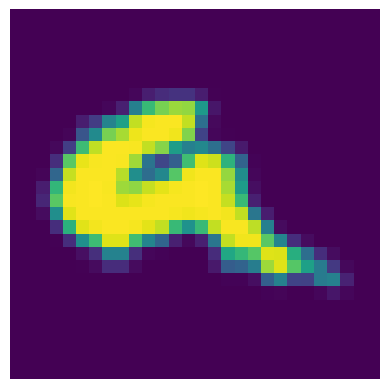

predicted image 1
Predicted as 1
Right lable is 1


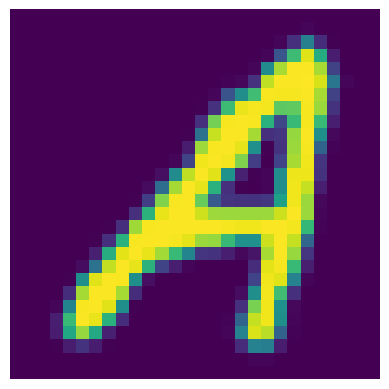

predicted image 2
Predicted as 1
Right lable is 1


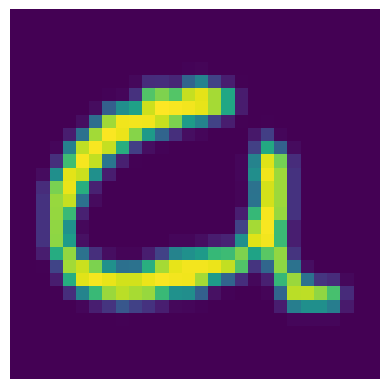

predicted image 3
Predicted as 17
Right lable is 1


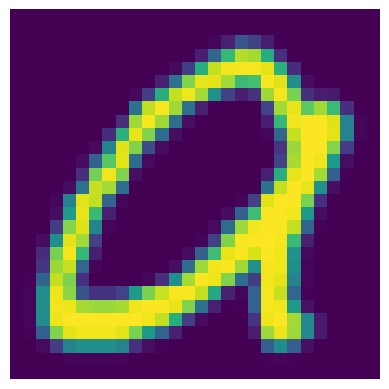

predicted image 4
Predicted as 1
Right lable is 1


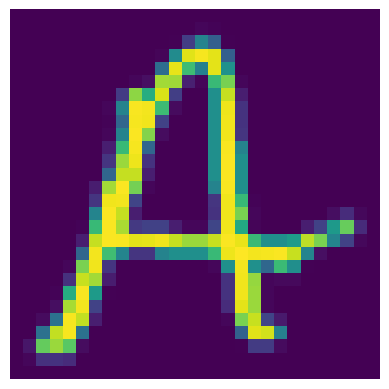

predicted image 5
Predicted as 1
Right lable is 1


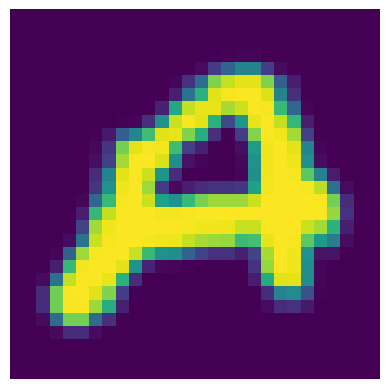

predicted image 6
Predicted as 1
Right lable is 1


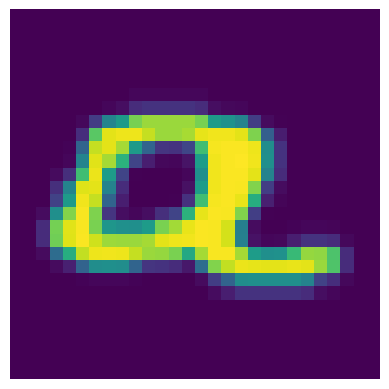

predicted image 7
Predicted as 1
Right lable is 1


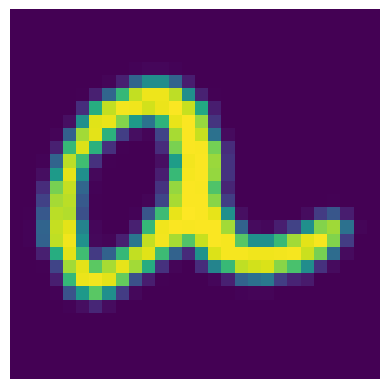

predicted image 8
Predicted as 1
Right lable is 1


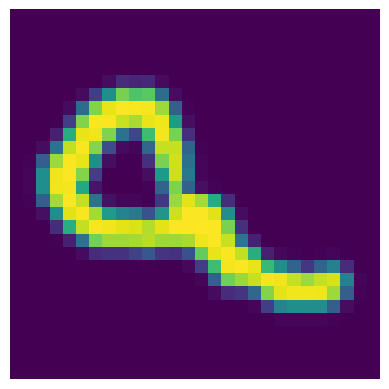

predicted image 9
Predicted as 1
Right lable is 1


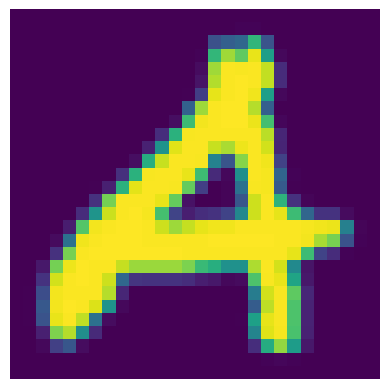

predicted image 10
Predicted as 2
Right lable is 1


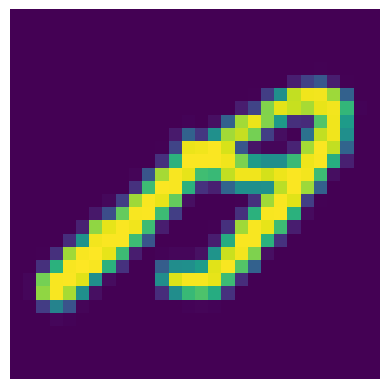

predicted image 11
Predicted as 1
Right lable is 1


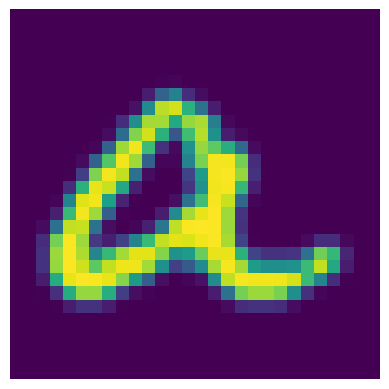

predicted image 12
Predicted as 1
Right lable is 1


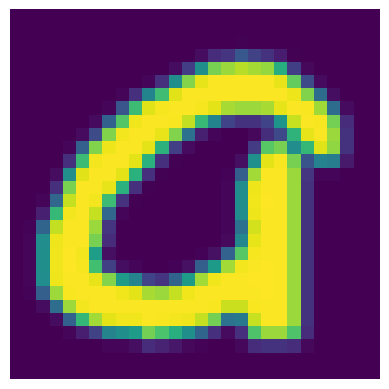

predicted image 13
Predicted as 1
Right lable is 1


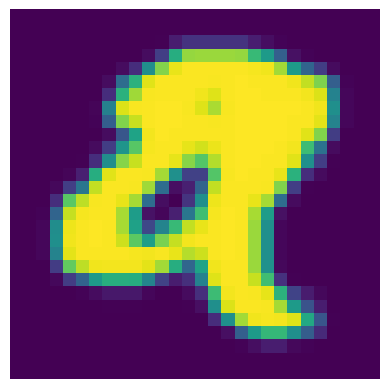

predicted image 14
Predicted as 1
Right lable is 1


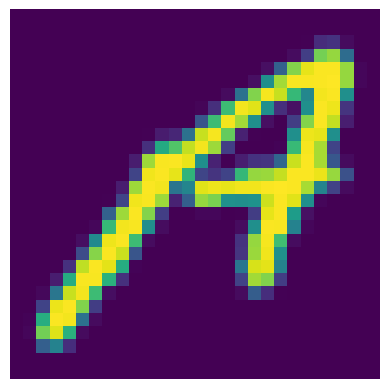

predicted image 15
Predicted as 1
Right lable is 1


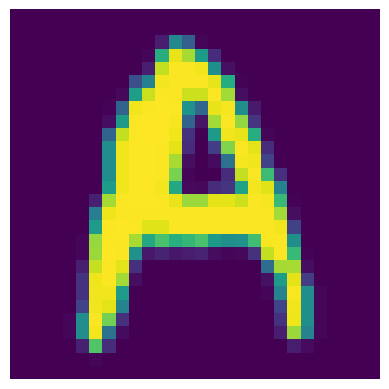

predicted image 16
Predicted as 1
Right lable is 1


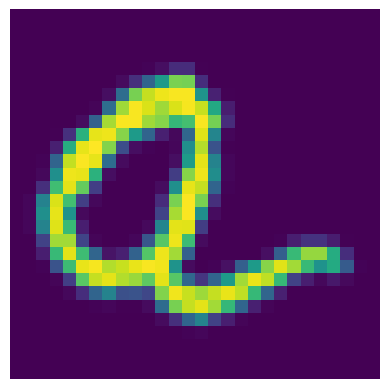

predicted image 17
Predicted as 1
Right lable is 1


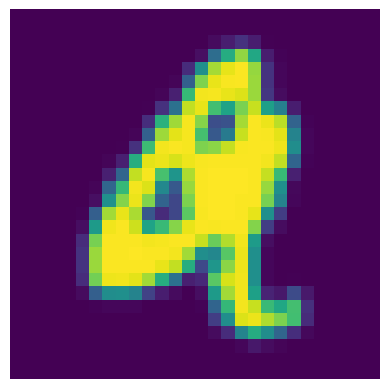

predicted image 18
Predicted as 1
Right lable is 1


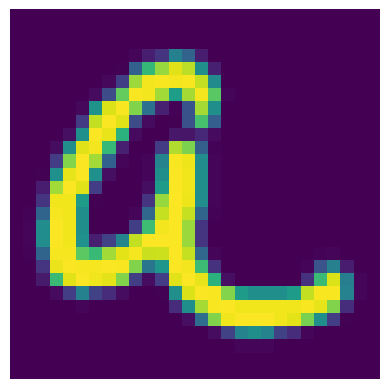

predicted image 19
Predicted as 1
Right lable is 1


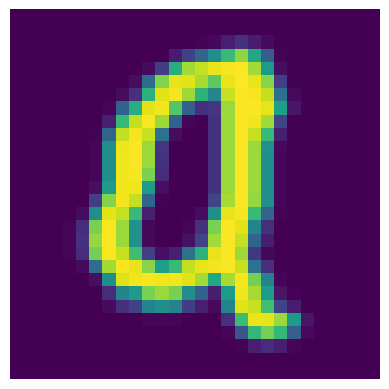

predicted image 20
Predicted as 1
Right lable is 1


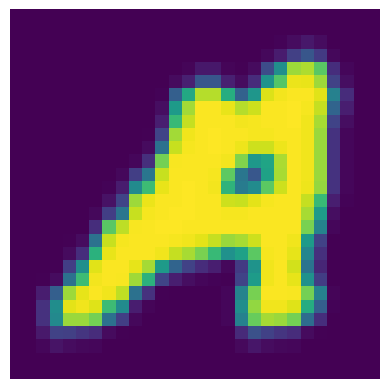

predicted image 21
Predicted as 1
Right lable is 1


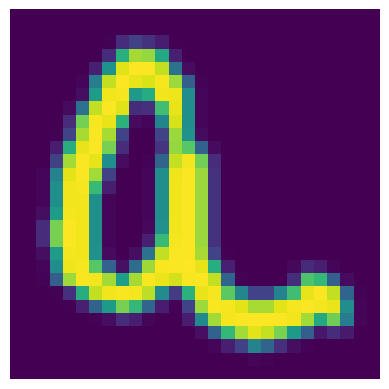

predicted image 22
Predicted as 1
Right lable is 1


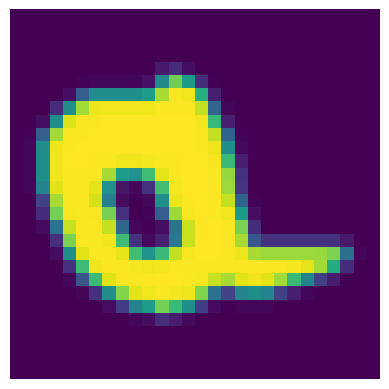

predicted image 23
Predicted as 1
Right lable is 1


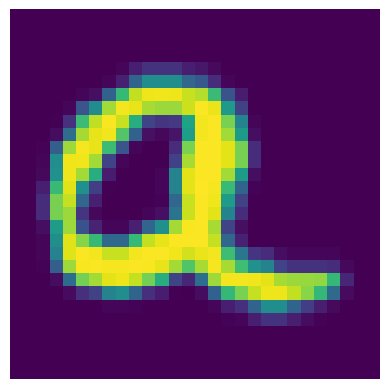

predicted image 24
Predicted as 1
Right lable is 1


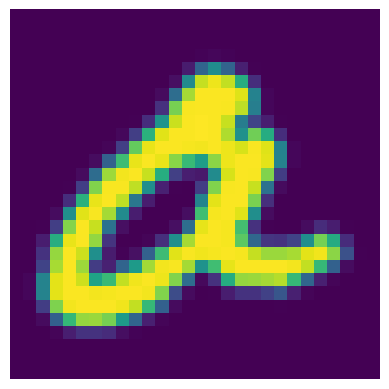

predicted image 25
Predicted as 1
Right lable is 1


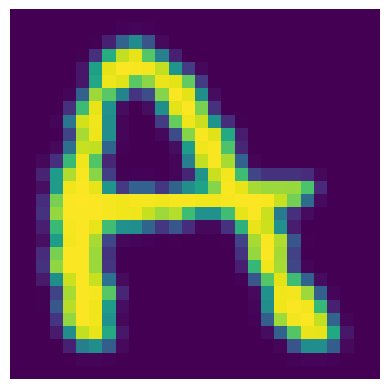

predicted image 26
Predicted as 1
Right lable is 1


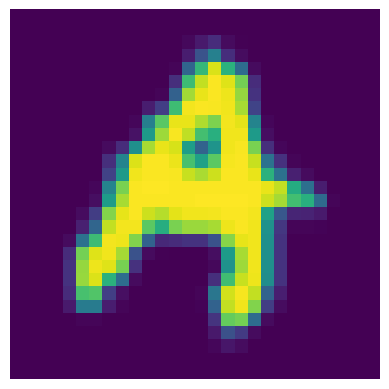

predicted image 27
Predicted as 1
Right lable is 1


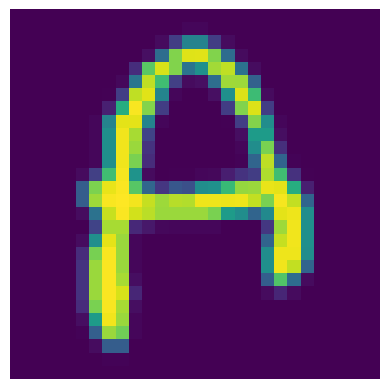

predicted image 28
Predicted as 1
Right lable is 1


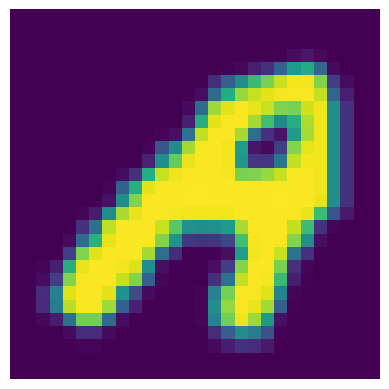

predicted image 29
Predicted as 1
Right lable is 1


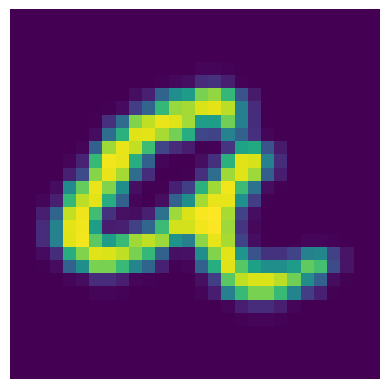

In [10]:
# Predicting test images
pred = network.predict(test_images)
#printing first thirty images
i = 0
for j in range(len(pred)):
    if i < 30:
        print("predicted image", i)
        print("Predicted as", np.argmax(pred[j]))
        print("Right lable is", np.argmax(test_labels[j]))
        i += 1
        test_image = np.reshape(test_images[j], (28, 28))
        plt.imshow(test_image) 
        plt.axis('off') 
        plt.show()

predicted image 1000
Predicted as 2
Right lable is 2


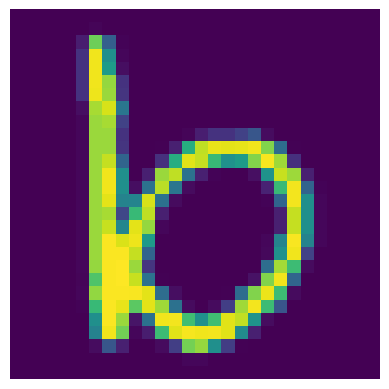

predicted image 1001
Predicted as 2
Right lable is 2


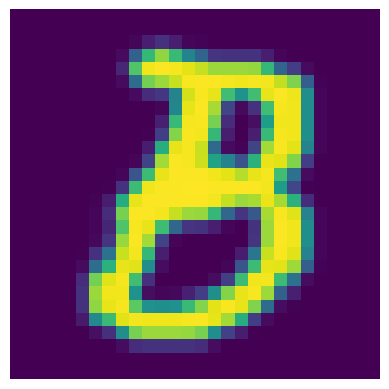

predicted image 1002
Predicted as 2
Right lable is 2


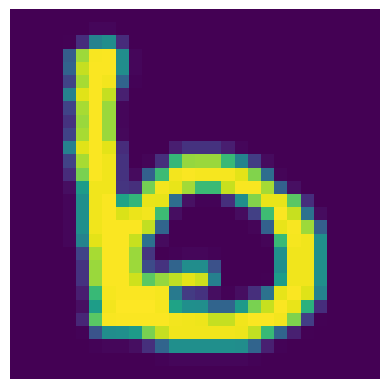

predicted image 1003
Predicted as 2
Right lable is 2


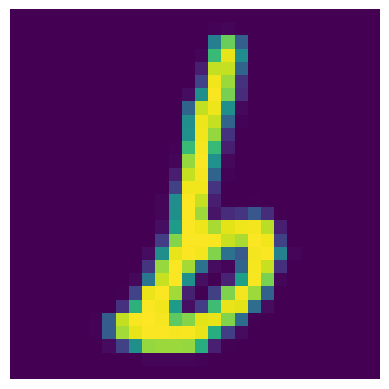

predicted image 1004
Predicted as 2
Right lable is 2


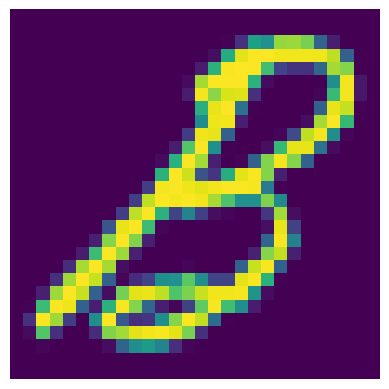

predicted image 1005
Predicted as 2
Right lable is 2


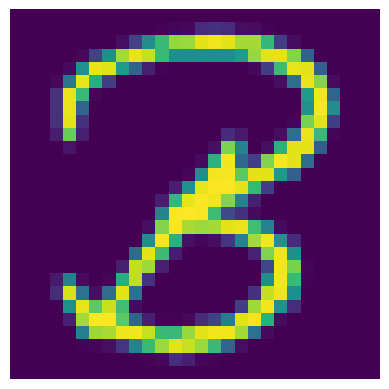

predicted image 1006
Predicted as 2
Right lable is 2


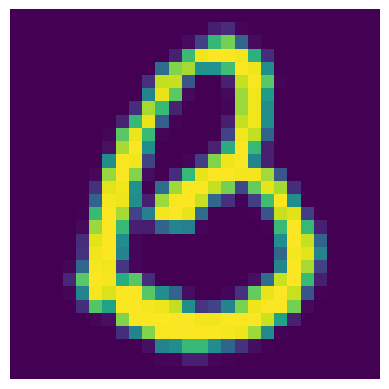

predicted image 1007
Predicted as 2
Right lable is 2


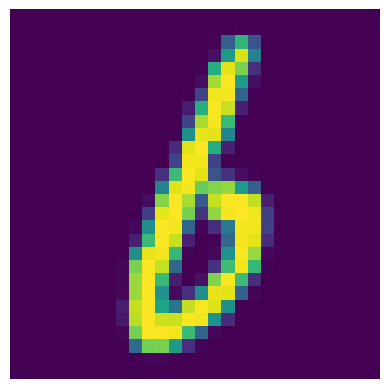

predicted image 1008
Predicted as 2
Right lable is 2


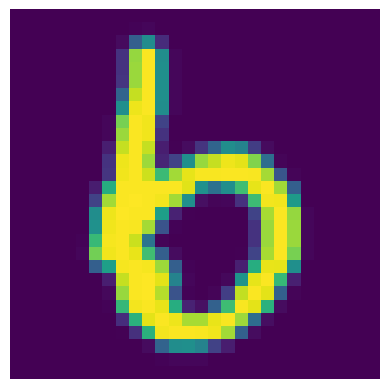

predicted image 1009
Predicted as 2
Right lable is 2


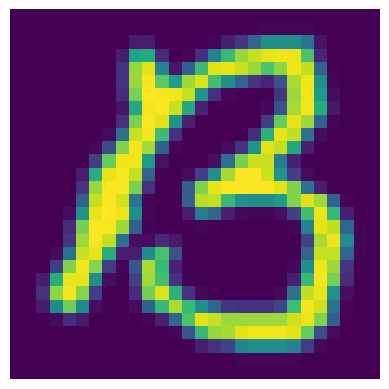

predicted image 1010
Predicted as 2
Right lable is 2


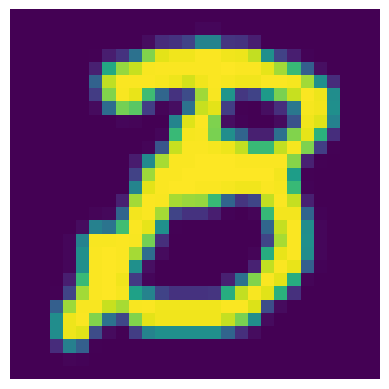

predicted image 1011
Predicted as 2
Right lable is 2


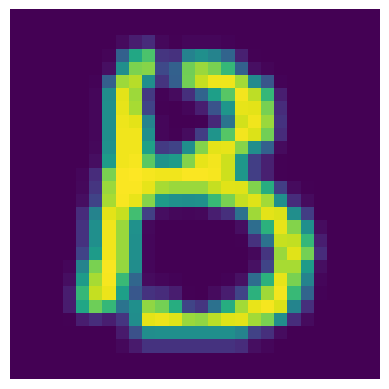

predicted image 1012
Predicted as 2
Right lable is 2


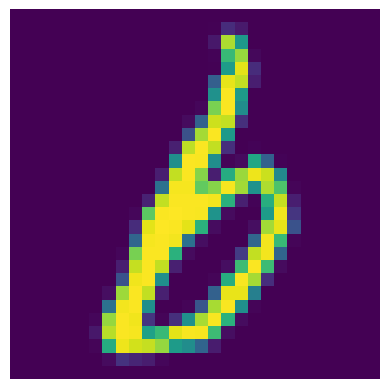

predicted image 1013
Predicted as 2
Right lable is 2


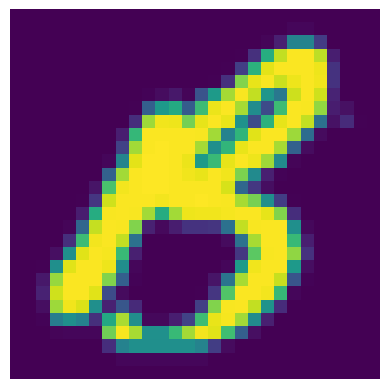

predicted image 1014
Predicted as 2
Right lable is 2


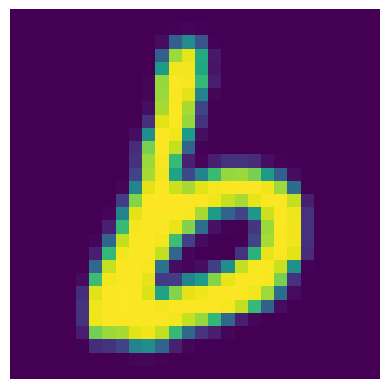

predicted image 1015
Predicted as 18
Right lable is 2


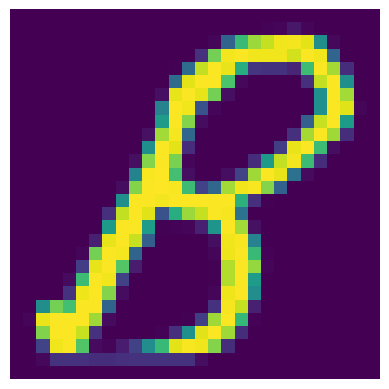

predicted image 1016
Predicted as 2
Right lable is 2


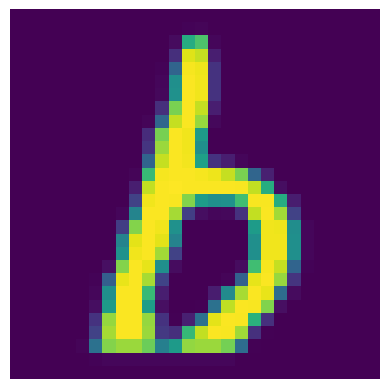

predicted image 1017
Predicted as 2
Right lable is 2


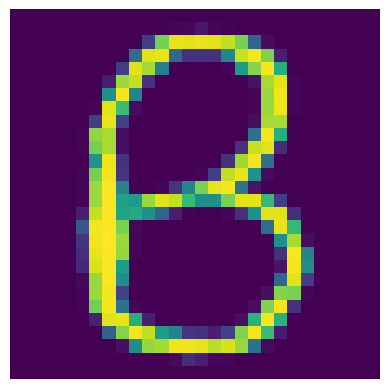

predicted image 1018
Predicted as 2
Right lable is 2


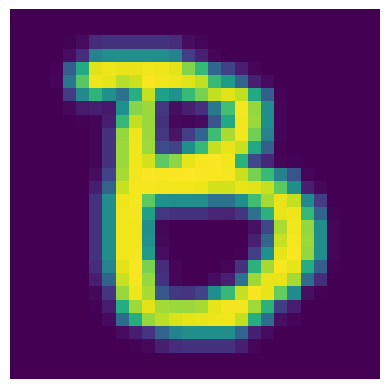

predicted image 1019
Predicted as 2
Right lable is 2


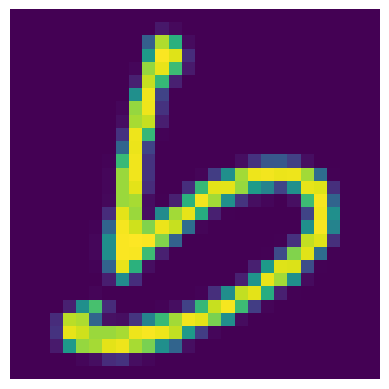

predicted image 1020
Predicted as 2
Right lable is 2


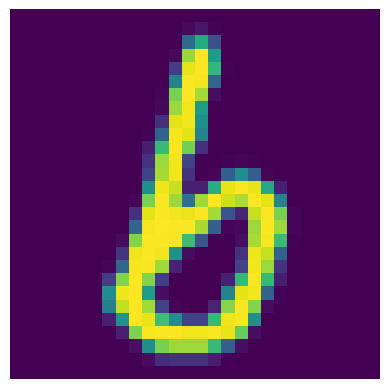

predicted image 1021
Predicted as 2
Right lable is 2


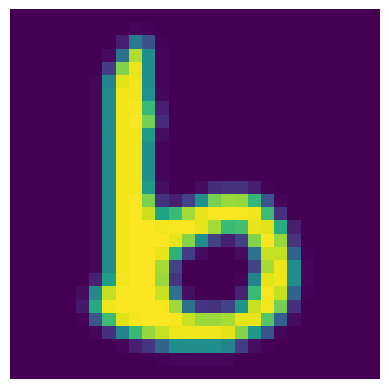

predicted image 1022
Predicted as 2
Right lable is 2


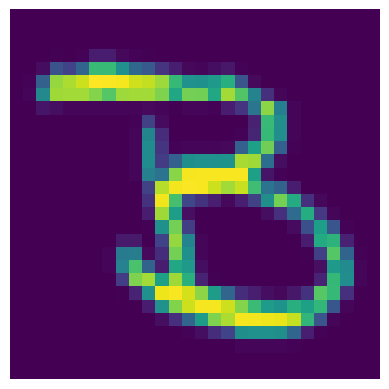

predicted image 1023
Predicted as 7
Right lable is 2


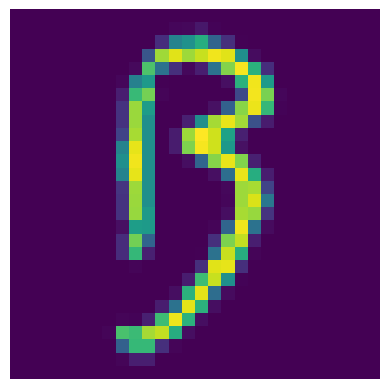

predicted image 1024
Predicted as 2
Right lable is 2


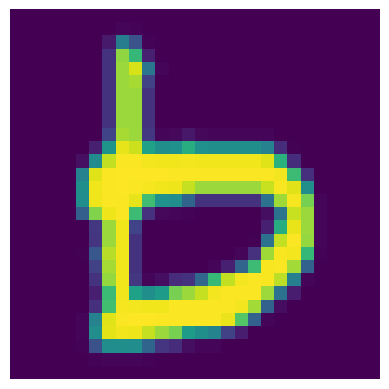

predicted image 1025
Predicted as 2
Right lable is 2


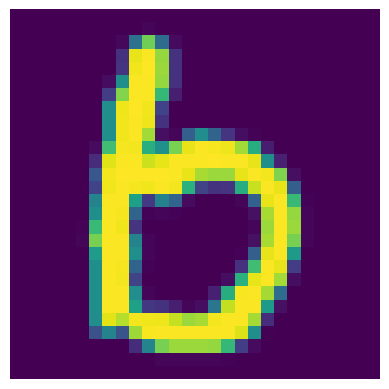

predicted image 1026
Predicted as 2
Right lable is 2


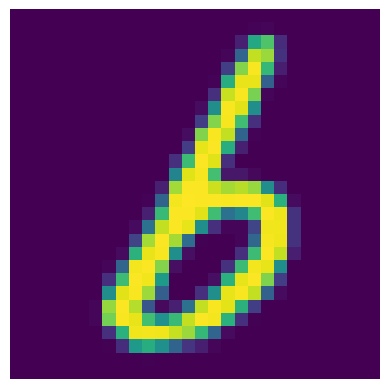

predicted image 1027
Predicted as 2
Right lable is 2


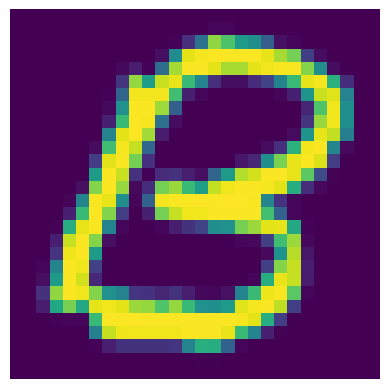

predicted image 1028
Predicted as 2
Right lable is 2


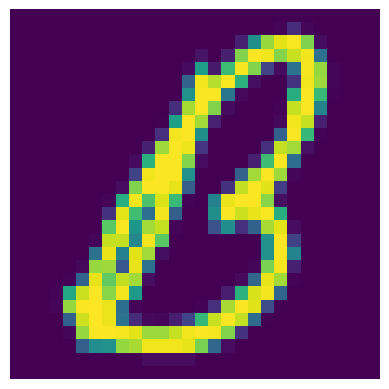

predicted image 1029
Predicted as 2
Right lable is 2


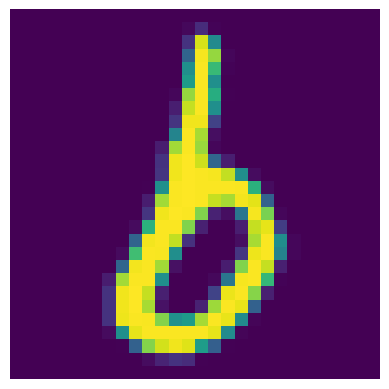

In [14]:
#Results for another letter
i = 1000
for j in range(1020, len(pred)):
    if i < 1030:
        print("predicted image", i)
        print("Predicted as", np.argmax(pred[j]))
        print("Right lable is", np.argmax(test_labels[j]))
        i += 1
        test_image = np.reshape(test_images[j], (28, 28))
        plt.imshow(test_image) 
        plt.axis('off') 
        plt.show()

In [16]:
network.save('emnist.h5')
print("Saving the model as emnist.h5")

Saving the model as emnist.h5


C:\Users\psiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
